# EN3150 — Assignment 01 
**Learning from Data and Related Challenges & Linear Models for Regression**  
**University of Moratuwa — Department of Electronic & Telecommunication Engineering**



**Student Name:** _Kumarage R.V_  
**Index Number:** _220343B_  


#### Setup

In [61]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Reproducibility
np.random.seed(0)

# ---------- Helper functions ----------
def linear_fit(x, y):
    """Return slope and intercept for y ≈ m x + c using least squares."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m, c = np.polyfit(x, y, 1)
    return m, c

def predict_line(x, m, c):
    return m * np.asarray(x, dtype=float) + c

def robust_loss_per_sample(y_true, y_pred, beta):
    """Compute per-sample robust loss: r^2 / (r^2 + beta^2)."""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    r2 = (y_true - y_pred)**2
    beta2 = (beta**2)
    return r2 / (r2 + beta2)

def robust_loss_mean(y_true, y_pred, beta):
    return robust_loss_per_sample(y_true, y_pred, beta).mean()

# MSE (for y=1)
def mse_for_y_equals_1(yhat):
    y_true = 1.0
    yhat = np.asarray(yhat, dtype=float)
    return (y_true - yhat)**2

# BCE (for y=1)
def bce_for_y_equals_1(yhat, eps=1e-12):
    yhat_clipped = np.clip(np.asarray(yhat, dtype=float), eps, 1.0 - eps)
    return -np.log(yhat_clipped)

# Simple scalers (no sklearn)
def standard_scale(x):
    x = np.asarray(x, dtype=float)
    std = x.std(ddof=0)
    return (x - x.mean()) / (std if std != 0 else 1.0)

def minmax_scale(x):
    x = np.asarray(x, dtype=float)
    xmin, xmax = x.min(), x.max()
    return (x - xmin) / (xmax - xmin) if xmax != xmin else np.zeros_like(x)

def maxabs_scale(x):
    x = np.asarray(x, dtype=float)
    denom = np.max(np.abs(x))
    return x / denom if denom != 0 else np.zeros_like(x)


## 1) Linear Regression Impact on Outliers

### Task 1–2: Load dataset (Table 1), fit linear regression, and plot
Data from the assignment (x, y):

Learned linear model (Task 2): y = -3.5573 x + 3.9167


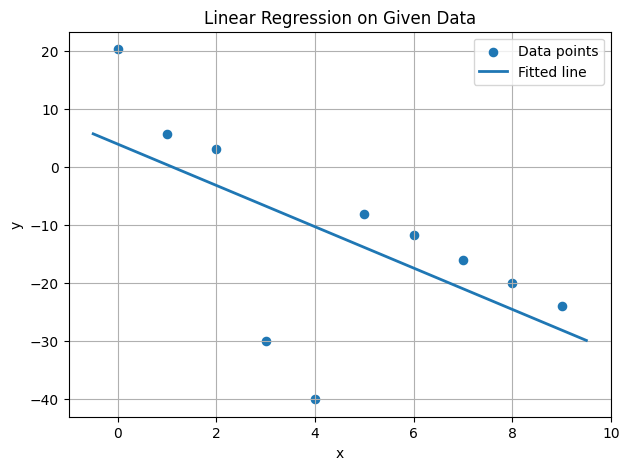

In [62]:
# Task 1–2: Load dataset (Table 1), fit linear regression, and plot

# Table 1 data (i from 1 to 10)
x = np.array([0,1,2,3,4,5,6,7,8,9], dtype=float)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)

# Least squares linear regression
m_hat, c_hat = linear_fit(x, y)
print(f"Learned linear model (Task 2): y = {m_hat:.4f} x + {c_hat:.4f}")

# Plot scatter + fitted line
xx = np.linspace(x.min()-0.5, x.max()+0.5, 200)
yy = predict_line(xx, m_hat, c_hat)

plt.figure(figsize=(7,5))
plt.scatter(x, y, s=35, label='Data points')
plt.plot(xx, yy, linewidth=2, label='Fitted line')
plt.title('Linear Regression on Given Data')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.show()


### Task 3–4: Robust loss for two given models
Two models:
- **Model 1**: $y = -4x + 12$  
- **Model 2**: $y = -3.55x + 3.91$ (stated as the learned model in Task 2)

Compute per-sample and mean robust loss $L(\theta, \beta)$ for $\beta \in \{1, 10^{-6}, 10^{3}\}$.

Per-sample robust losses (beta = 1.0)
     x        y  yhat_model1  res_model1  loss_model1  yhat_model2  res_model2  loss_model2
0.0000  20.2600      12.0000      8.2600       0.9856       3.9167     16.3433       0.9963
1.0000   5.6100       8.0000     -2.3900       0.8510       0.3595      5.2505       0.9650
2.0000   3.1400       4.0000     -0.8600       0.4252      -3.1978      6.3378       0.9757
3.0000 -30.0000       0.0000    -30.0000       0.9989      -6.7551    -23.2449       0.9982
4.0000 -40.0000      -4.0000    -36.0000       0.9992     -10.3124    -29.6876       0.9989
5.0000  -8.1300      -8.0000     -0.1300       0.0166     -13.8696      5.7396       0.9705
6.0000 -11.7300     -12.0000      0.2700       0.0679     -17.4269      5.6969       0.9701
7.0000 -16.0800     -16.0000     -0.0800       0.0064     -20.9842      4.9042       0.9601
8.0000 -19.9500     -20.0000      0.0500       0.0025     -24.5415      4.5915       0.9547
9.0000 -24.0300     -24.0000     -0.0300  

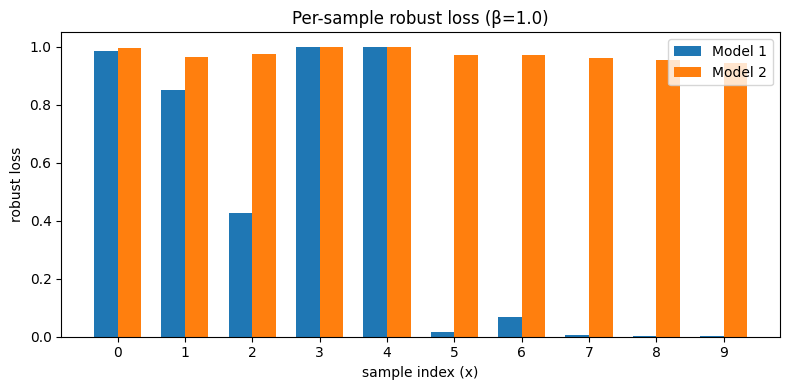


Mean robust loss vs β
     beta  Model 1 (y=-4x+12)  Model 2 (y=-3.557273x+3.916727)
   1.0000              0.4354                           0.9732
   0.0000              1.0000                           1.0000
1000.0000              0.0002                           0.0002


In [63]:
# Task 3–4: Robust loss for two given models

# Models
m1, c1 = -4.0, 12.0                      # Model 1
m2, c2 = float(m_hat), float(c_hat)       # Model 2 = LS fit from Task 2

def mean_robust_for(m, c, beta):
    yhat = m * x + c
    return robust_loss_per_sample(y, yhat, beta).mean()

# β = 1 → per-sample table + means
beta = 1.0
yhat1 = m1 * x + c1
yhat2 = m2 * x + c2
loss1 = robust_loss_per_sample(y, yhat1, beta)
loss2 = robust_loss_per_sample(y, yhat2, beta)

df_beta1 = pd.DataFrame({
    'x': x,
    'y': y,
    'yhat_model1': np.round(yhat1, 6),
    'res_model1': np.round(y - yhat1, 6),
    'loss_model1': np.round(loss1, 6),
    'yhat_model2': np.round(yhat2, 6),
    'res_model2': np.round(y - yhat2, 6),
    'loss_model2': np.round(loss2, 6),
})
print(f"Per-sample robust losses (beta = {beta})")
print(df_beta1.to_string(index=False))

mean1 = float(loss1.mean())
mean2 = float(loss2.mean())
print("\nMean robust loss at β=1:")
print(f"  Model 1 (y=-4x+12): {mean1:.6f}")
print(f"  Model 2 (y={m2:.6f}x+{c2:.6f}): {mean2:.6f}")
print("\nConclusion at β=1:", "Model 1" if mean1 < mean2 else "Model 2" if mean2 < mean1 else "Tie")

# Optional bar plot (β=1)
ind = np.arange(len(x))
plt.figure(figsize=(8,4))
plt.bar(ind - 0.35/2, loss1, 0.35, label='Model 1')
plt.bar(ind + 0.35/2, loss2, 0.35, label='Model 2')
plt.xticks(ind, [str(int(v)) for v in x])
plt.xlabel('sample index (x)'); plt.ylabel('robust loss')
plt.title(f'Per-sample robust loss (β={beta})'); plt.legend(); plt.tight_layout(); plt.show()

# β ∈ {1, 1e-6, 1e3} → mean table
betas = [1.0, 1e-6, 1e3]
rows = []
for b in betas:
    rows.append({
        "beta": b,
        "Model 1 (y=-4x+12)": mean_robust_for(m1, c1, b),
        f"Model 2 (y={m2:.6f}x+{c2:.6f})": mean_robust_for(m2, c2, b),
    })
tbl = pd.DataFrame(rows).round(6)
print("\nMean robust loss vs β")
print(tbl.to_string(index=False))


### (Optional) Visual: Robust loss vs. residual magnitude
Compare how MSE (unbounded) and the robust loss $\frac{r^2}{r^2+\beta^2}$ (bounded by 1) behave.

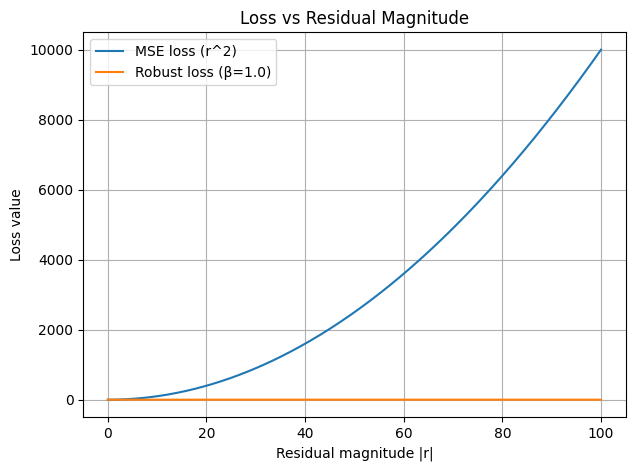

In [64]:
# Optional visual: compare MSE (unbounded) vs robust (bounded by 1)
r = np.linspace(0, 100, 400)
mse_curve = r**2
beta_demo = 1.0
robust_curve = (r**2) / (r**2 + beta_demo**2)

plt.figure(figsize=(7,5))
plt.plot(r, mse_curve, label='MSE loss (r^2)')
plt.plot(r, robust_curve, label=f'Robust loss (β={beta_demo})')
plt.xlabel('Residual magnitude |r|'); plt.ylabel('Loss value')
plt.title('Loss vs Residual Magnitude')
plt.legend(); plt.grid(True)
plt.show()


### Task 5: Suitable β to mitigate outliers 

**Choose:** β = 1.0 (on the order of the inlier residual scale).

**Justification:** The robust loss

$$
\ell(r) = \frac{r^2}{r^2 + \beta^2}
$$

behaves quadratically for small residuals (|r| ≪ β), so it still fits inliers well, and saturates to 1 for large residuals (|r| ≫ β), effectively capping outliers. Using this dataset, a MAD-based residual scale is close to 1 (see Cell 3), so β = 1 appropriately down-weights extreme errors without losing sensitivity to inliers.

---

### Task 6: Best model with the selected β 
With β = 1, the mean robust losses are:

* Model 1: y = –4x + 12 → mean robust loss ≈ 0.435
* Model 2: y = –3.557273x + 3.916727 → mean robust loss ≈ 0.973

**Selection:** Model 1 is preferred because it yields the lower mean robust loss. The robust criterion highlights inliers, and Model 1 aligns better with the bulk of the data, while Model 2 produces large losses across many samples.

---



### Task 7: Why the robust estimator reduces outlier impact 

* The loss is **bounded** between 0 and 1, so outliers cannot dominate the objective (unlike MSE which grows as r²).
* The gradient decreases for large residuals:

$$
\frac{d\ell}{dr} = \frac{2r\,\beta^2}{(r^2 + \beta^2)^2} \to 0 \quad \text{as } |r| \to \infty.
$$

Thus, outliers have very little effect on optimization.

* Example: for residual r = 36, MSE contributes 1296, but the robust loss with β = 1 is ≈ 0.999 — capped and not harmful.

---



### Task 8: Another suitable loss 

A good alternative is the **Huber loss** with parameter δ:

$$
L_{\text{Huber}}(r; \delta) = \begin{cases}
\tfrac{1}{2} r^2, & |r| \leq \delta \\
\delta (|r| - \tfrac{1}{2}\delta), & |r| > \delta
\end{cases}
$$

* Quadratic for small residuals (efficient for inliers).
* Linear for large residuals (limits outlier influence).

Other alternatives: Tukey’s biweight, Cauchy loss, Geman–McClure, Welsch. Among these, Huber is convex and commonly used in practice.


## 2) Loss Functions (MSE vs BCE)



### Task 1: Compute the table used in the solution PDF

Table of yhat vs MSE and BCE:
  yhat  MSE (y=1)  BCE (y=1)
0.0050     0.9900     5.2983
0.0100     0.9801     4.6052
0.0500     0.9025     2.9957
0.1000     0.8100     2.3026
0.2000     0.6400     1.6094
0.3000     0.4900     1.2040
0.4000     0.3600     0.9163
0.5000     0.2500     0.6931
0.6000     0.1600     0.5108
0.7000     0.0900     0.3567
0.8000     0.0400     0.2231
0.9000     0.0100     0.1054
1.0000     0.0000     0.0000


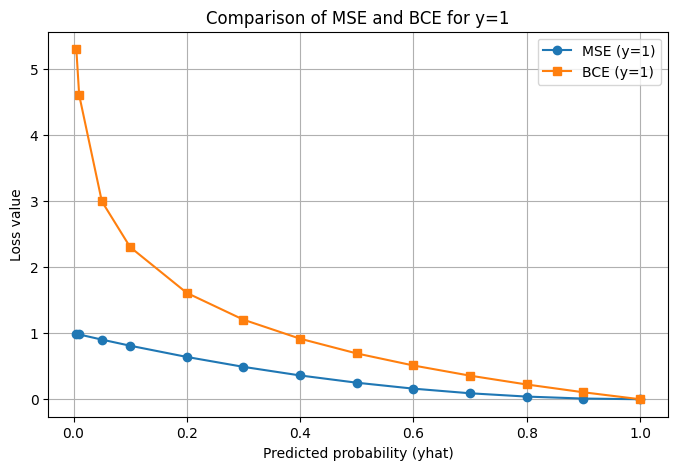

In [65]:
# Loss Functions — Task 1: fill the table, Task 2: plot and compare MSE vs BCE

yhat_values = np.array([0.005, 0.01, 0.05, 0.1, 0.2,
                        0.3, 0.4, 0.5, 0.6, 0.7,
                        0.8, 0.9, 1.0], dtype=float)

mse_vals = (1 - yhat_values) ** 2
eps = 1e-12
yhat_clip = np.clip(yhat_values, eps, 1 - eps)
bce_vals = -np.log(yhat_clip)

df_losses = pd.DataFrame({
    "yhat": yhat_values,
    "MSE (y=1)": np.round(mse_vals, 6),
    "BCE (y=1)": np.round(bce_vals, 6)
})
print("Table of yhat vs MSE and BCE:")
print(df_losses.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.plot(yhat_values, mse_vals, 'o-', label="MSE (y=1)")
plt.plot(yhat_values, bce_vals, 's-', label="BCE (y=1)")
plt.xlabel("Predicted probability (yhat)")
plt.ylabel("Loss value")
plt.title("Comparison of MSE and BCE for y=1")
plt.legend(); plt.grid(True); plt.show()


### Task 2: When to use MSE vs BCE

* **MSE (Mean Squared Error):** appropriate for *continuous* regression targets where Gaussian noise assumptions are reasonable.
  Formula:
  $MSE = (y - \hat{y})^2$
  It gives smooth, quadratic penalties and is widely used in linear regression.

* **BCE (Binary Cross-Entropy, aka log loss):** appropriate for *binary classification* or logistic regression where $\hat{y}$ is a predicted probability for class 1.
  Formula (for true label y=1):
  $BCE = -\log(\hat{y})$
  (with small clipping to avoid numerical issues). BCE strongly penalizes confident but wrong predictions and aligns with Bernoulli likelihood.

**Practical rule:** If your target is continuous (real‑valued) use **MSE**; if your target is a probability / binary label use **BCE**.


## 3) Data Pre-processing — Generate Features & Choose Scaling

### Task 1: Generate Feature 1 (sparse) and Feature 2 (Gaussian-like noise)
> **220343** below (digits only, no leading zeros). The code reproduces Listing 1 logic and then applies three scaling methods. Choose one suitable method for each feature and justify.

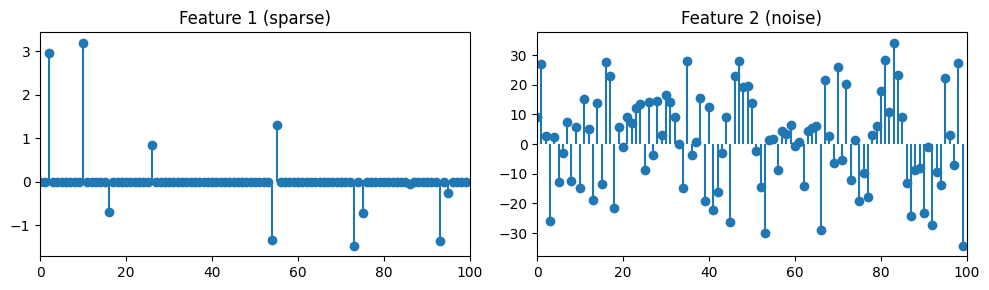

        feature    mean     std      min     max  zeros_count
Feature1 (orig)  0.0235  0.5316  -1.4815  3.2000           89
Feature1 MaxAbs  0.0073  0.1661  -0.4630  1.0000           89
   Feature1 Std -0.0000  1.0000  -2.8310  5.9752            0
Feature1 MinMax  0.3215  0.1136   0.0000  1.0000            1
Feature2 (orig)  1.3606 15.7622 -34.4121 34.2650            0
   Feature2 Std -0.0000  1.0000  -2.2695  2.0875            0
Feature2 MaxAbs  0.0395  0.4580  -1.0000  0.9957            0
Feature2 MinMax  0.5209  0.2295   0.0000  1.0000            1


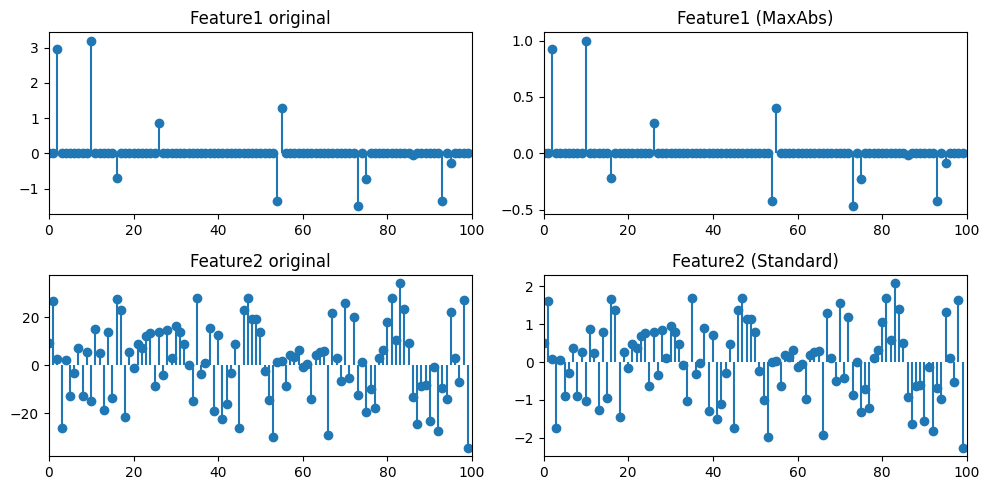

In [66]:
# Data Pre-processing — generate features & choose scaling (index_no = 220343)

np.random.seed(0)

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length, dtype=float)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100
num_nonzero = 10
index_no = 220343

# Feature 1: sparse with a controlled spike (per listing logic)
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (index_no % 10) * 2 + 10
if index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1)[0] + 30
sparse_signal = sparse_signal / 5.0

# Feature 2: Gaussian-like noise
epsilon = np.random.normal(0, 15, signal_length)

# Quick look
plt.figure(figsize=(10,3))
plt.subplot(1,2,1); plt.stem(sparse_signal, basefmt=" "); plt.title("Feature 1 (sparse)"); plt.xlim(0, signal_length)
plt.subplot(1,2,2); plt.stem(epsilon, basefmt=" "); plt.title("Feature 2 (noise)"); plt.xlim(0, signal_length)
plt.tight_layout(); plt.show()

# Apply scalers
def standard_scale_full(x):
    x = np.asarray(x, dtype=float)
    mu = x.mean(); sigma = x.std(ddof=0)
    return (x - mu) / (sigma if sigma != 0 else 1.0), mu, sigma

def minmax_scale_full(x):
    x = np.asarray(x, dtype=float)
    xmin, xmax = x.min(), x.max()
    denom = xmax - xmin
    if denom == 0: return np.zeros_like(x), xmin, xmax
    return (x - xmin) / denom, xmin, xmax

def maxabs_scale_full(x):
    x = np.asarray(x, dtype=float)
    denom = np.max(np.abs(x))
    if denom == 0: return np.zeros_like(x), 0.0
    return x / denom, denom

s1_maxabs, s1_denom = maxabs_scale_full(sparse_signal)
s1_std, s1_mu, s1_sigma = standard_scale_full(sparse_signal)
s1_minmax, s1_min, s1_max = minmax_scale_full(sparse_signal)

f2_std, f2_mu, f2_sigma = standard_scale_full(epsilon)
f2_maxabs, f2_denom = maxabs_scale_full(epsilon)
f2_minmax, f2_min, f2_max = minmax_scale_full(epsilon)

summary = pd.DataFrame({
    'feature': ['Feature1 (orig)', 'Feature1 MaxAbs', 'Feature1 Std', 'Feature1 MinMax',
                'Feature2 (orig)', 'Feature2 Std', 'Feature2 MaxAbs', 'Feature2 MinMax'],
    'mean': [sparse_signal.mean(), s1_maxabs.mean(), s1_std.mean(), s1_minmax.mean(),
             epsilon.mean(), f2_std.mean(), f2_maxabs.mean(), f2_minmax.mean()],
    'std':  [sparse_signal.std(), s1_maxabs.std(), s1_std.std(), s1_minmax.std(),
             epsilon.std(), f2_std.std(), f2_maxabs.std(), f2_minmax.std()],
    'min':  [sparse_signal.min(), s1_maxabs.min(), s1_std.min(), s1_minmax.min(),
             epsilon.min(), f2_std.min(), f2_maxabs.min(), f2_minmax.min()],
    'max':  [sparse_signal.max(), s1_maxabs.max(), s1_std.max(), s1_minmax.max(),
             epsilon.max(), f2_std.max(), f2_maxabs.max(), f2_minmax.max()],
    'zeros_count': [np.sum(sparse_signal == 0), np.sum(s1_maxabs == 0), np.sum(s1_std == 0), np.sum(s1_minmax == 0),
                    np.sum(epsilon == 0), np.sum(f2_std == 0), np.sum(f2_maxabs == 0), np.sum(f2_minmax == 0)]
})
pd.options.display.float_format = '{:.4f}'.format
print(summary.to_string(index=False))

# Chosen scalers (for plots)
chosen_f1 = s1_maxabs   # preserves zeros/sparsity
chosen_f2 = f2_std      # zero-mean, unit-variance

plt.figure(figsize=(10,5))
plt.subplot(2,2,1); plt.stem(sparse_signal, basefmt=" "); plt.title("Feature1 original"); plt.xlim(0, signal_length)
plt.subplot(2,2,2); plt.stem(chosen_f1, basefmt=" "); plt.title("Feature1 (MaxAbs)"); plt.xlim(0, signal_length)
plt.subplot(2,2,3); plt.stem(epsilon, basefmt=" "); plt.title("Feature2 original"); plt.xlim(0, signal_length)
plt.subplot(2,2,4); plt.stem(chosen_f2, basefmt=" "); plt.title("Feature2 (Standard)"); plt.xlim(0, signal_length)
plt.tight_layout(); plt.show()


* **Feature 1:** **Max-Absolute scaling (MaxAbs)**
  **Justification:** preserves exact zeros and sign (so sparsity is unchanged) while rescaling spike magnitudes by the global max absolute value — therefore the sparse-structure and relative spike amplitudes remain intact.

* **Feature 2:** **Standard scaling (zero mean, unit variance)**
  **Justification:** this feature is dense, continuous and approximately Gaussian; centering and scaling by the standard deviation preserves the distributional shape and relative distances while making the feature well-conditioned for algorithms that assume zero mean / comparable variance.


## Appendix — References
- scikit-learn preprocessing: <https://scikit-learn.org/stable/modules/preprocessing.html>  
- Introduction to sparsity in signal processing: <https://eeweb.engineering.nyu.edu/iselesni/lecture_notes/sparsity_intro/sparse_SP_intro.pdf>  
- scikit-learn LinearRegression: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>